In [49]:
import os
import zipfile


path_to_dataset = "/content/Citra_BISIND(Augmented).zip"


extract_to = os.path.join(os.path.dirname(path_to_dataset), "extracted")


os.makedirs(extract_to, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(path_to_dataset, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Extracted {path_to_dataset} to {extract_to}")

Extracted /content/Citra_BISIND(Augmented).zip to /content/extracted


In [4]:
import os

def count_images_per_folder(root_dir):
  """Counts the number of images in each subfolder of the root directory.

  Args:
    root_dir: The path to the root directory.

  Returns:
    A dictionary where keys are folder names and values are the number of images
    in each folder.
  """

  image_counts = {}
  for folder_name in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder_name)
    if os.path.isdir(folder_path):
      image_count = 0
      for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
          image_count += 1
      image_counts[folder_name] = image_count
  return image_counts

# Example usage:
image_counts = count_images_per_folder("/content/CitraBISINDO")
for folder, count in image_counts.items():
  print(f"Folder: {folder}, Image Count: {count}")

Folder: X, Image Count: 156
Folder: D, Image Count: 156
Folder: Y, Image Count: 156
Folder: Q, Image Count: 156
Folder: K, Image Count: 156
Folder: U, Image Count: 156
Folder: R, Image Count: 156
Folder: S, Image Count: 156
Folder: P, Image Count: 156
Folder: E, Image Count: 156
Folder: I, Image Count: 156
Folder: T, Image Count: 156
Folder: L, Image Count: 156
Folder: A, Image Count: 156
Folder: M, Image Count: 156
Folder: O, Image Count: 156
Folder: F, Image Count: 156
Folder: W, Image Count: 156
Folder: G, Image Count: 156
Folder: C, Image Count: 156
Folder: B, Image Count: 156
Folder: H, Image Count: 156
Folder: V, Image Count: 156
Folder: J, Image Count: 156
Folder: Z, Image Count: 156
Folder: N, Image Count: 156


Pemodelan


In [5]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image

In [6]:
# Path to the augmented dataset
dataset_path = "/content/CitraBISINDO"
target_size = (128, 128)  # Resize all images to 128x128
num_classes = len(os.listdir(dataset_path))  # Number of classes (A-Z)


In [7]:
# Load and preprocess the dataset
def load_data(dataset_path, target_size):
    images = []
    labels = []
    class_labels = sorted(os.listdir(dataset_path))
    class_to_index = {class_name: idx for idx, class_name in enumerate(class_labels)}

    for class_name in class_labels:
        class_folder = os.path.join(dataset_path, class_name)
        for file_name in os.listdir(class_folder):
            file_path = os.path.join(class_folder, file_name)
            if file_name.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff')):
                try:
                    image = Image.open(file_path).convert('RGB')
                    image = image.resize(target_size)
                    images.append(np.array(image))
                    labels.append(class_to_index[class_name])
                except Exception as e:
                    print(f"Error loading image {file_path}: {e}")
    return np.array(images), np.array(labels), class_labels

print("Loading data...")
images, labels, class_labels = load_data(dataset_path, target_size)


Loading data...


In [9]:
# Normalize images to [0, 1]
images = images / 255.0

In [10]:
# Stratified train-test split
X_train, X_val, y_train, y_val = train_test_split(
    images, labels, test_size=0.2, stratify=labels, random_state=42
)

In [11]:
# One-hot encode labels
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)

In [12]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(target_size[0], target_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
# Train the model
print("Training the model...")
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Training the model...
Epoch 1/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.0956 - loss: 3.1201 - val_accuracy: 0.6453 - val_loss: 1.3915
Epoch 2/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.5265 - loss: 1.5852 - val_accuracy: 0.8276 - val_loss: 0.7549
Epoch 3/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.7100 - loss: 1.0245 - val_accuracy: 0.8990 - val_loss: 0.4664
Epoch 4/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.7831 - loss: 0.7125 - val_accuracy: 0.9273 - val_loss: 0.4021
Epoch 5/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.8261 - loss: 0.5858 - val_accuracy: 0.9175 - val_loss: 0.3734
Epoch 6/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.8659 - loss: 0.4506 - val_accuracy: 0.9286 - val_loss: 0.3090
Epoch 7/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.8790 - loss: 0.3725 - val_accuracy: 0.9310 - val_loss: 0.3354
Epoch 8/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.8995 - l

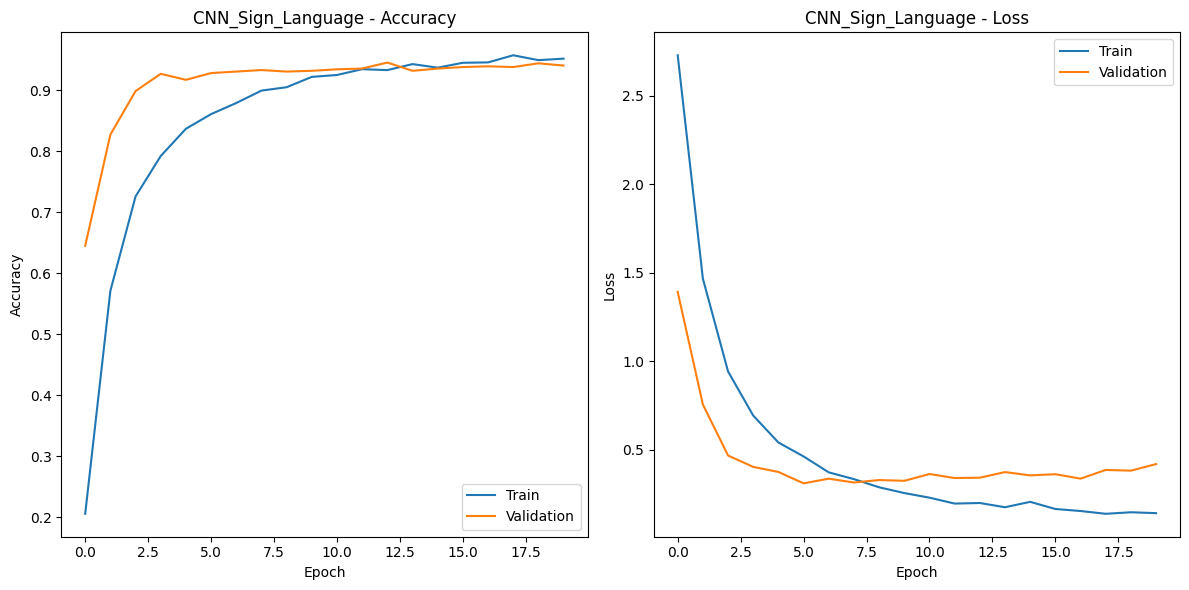

In [16]:
import matplotlib.pyplot as plt

# Function to plot training history
def plot_history(history, model_name):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'])

    # Show the plots
    plt.tight_layout()
    plt.show()

model_name = "CNN_Sign_Language"
   # Plot training history
plot_history(history, model_name)

In [17]:
# Save the model
model.save("/content/sign_language_model.h5")
print("Model saved as sign_language_model.h5")

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

Model saved as sign_language_model.h5
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 332ms/step - accuracy: 0.9403 - loss: 0.4242
Validation Accuracy: 94.09%


Saving WIN_20250102_20_11_35_Pro.jpg to WIN_20250102_20_11_35_Pro (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


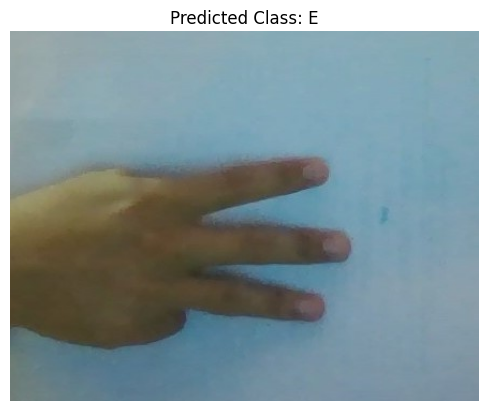

In [44]:

import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files

# Load the trained model
model = load_model('/content/sign_language_model.h5')

# Function to preprocess the uploaded image
def preprocess_image(img_path, target_size=(128, 128)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize
    return img_array

# Upload image from local device
uploaded = files.upload()

for fn in uploaded.keys():
    # Preprocess the image
    img_path = fn
    img_array = preprocess_image(img_path)

    # Make predictions
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    # Class labels (replace with your actual class labels)
    class_labels = sorted(os.listdir("/content/CitraBISINDO")) # Assuming your dataset directory is still the same

    # Display the image and the prediction
    plt.imshow(image.load_img(img_path))
    plt.title(f"Predicted Class: {class_labels[predicted_class]}")
    plt.axis('off')  # Hide axis ticks
    plt.show()

Saving WIN_20250102_20_13_58_Pro.jpg to WIN_20250102_20_13_58_Pro (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


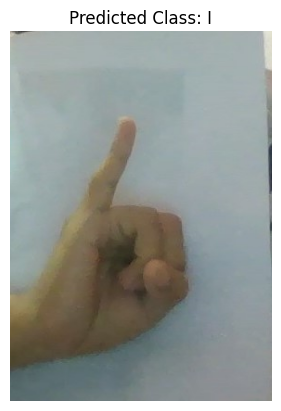

In [45]:

import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files

# Load the trained model
model = load_model('/content/sign_language_model.h5')

# Function to preprocess the uploaded image
def preprocess_image(img_path, target_size=(128, 128)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize
    return img_array

# Upload image from local device
uploaded = files.upload()

for fn in uploaded.keys():
    # Preprocess the image
    img_path = fn
    img_array = preprocess_image(img_path)

    # Make predictions
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    # Class labels (replace with your actual class labels)
    class_labels = sorted(os.listdir("/content/CitraBISINDO")) # Assuming your dataset directory is still the same

    # Display the image and the prediction
    plt.imshow(image.load_img(img_path))
    plt.title(f"Predicted Class: {class_labels[predicted_class]}")
    plt.axis('off')  # Hide axis ticks
    plt.show()

Saving WIN_20250102_20_20_27_Pro.jpg to WIN_20250102_20_20_27_Pro (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


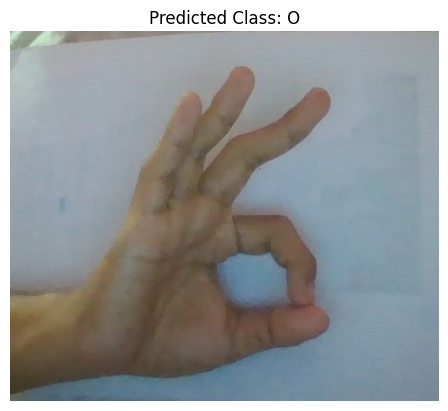

In [46]:

import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files

# Load the trained model
model = load_model('/content/sign_language_model.h5')

# Function to preprocess the uploaded image
def preprocess_image(img_path, target_size=(128, 128)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize
    return img_array

# Upload image from local device
uploaded = files.upload()

for fn in uploaded.keys():
    # Preprocess the image
    img_path = fn
    img_array = preprocess_image(img_path)

    # Make predictions
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    # Class labels (replace with your actual class labels)
    class_labels = sorted(os.listdir("/content/CitraBISINDO")) # Assuming your dataset directory is still the same

    # Display the image and the prediction
    plt.imshow(image.load_img(img_path))
    plt.title(f"Predicted Class: {class_labels[predicted_class]}")
    plt.axis('off')  # Hide axis ticks
    plt.show()

Saving WIN_20250102_20_26_49_Pro.jpg to WIN_20250102_20_26_49_Pro (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


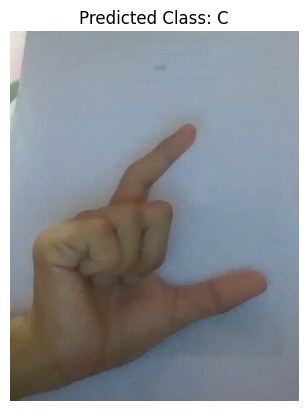

In [48]:

import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files

# Load the trained model
model = load_model('/content/sign_language_model.h5')

# Function to preprocess the uploaded image
def preprocess_image(img_path, target_size=(128, 128)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize
    return img_array

# Upload image from local device
uploaded = files.upload()

for fn in uploaded.keys():
    # Preprocess the image
    img_path = fn
    img_array = preprocess_image(img_path)

    # Make predictions
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    # Class labels (replace with your actual class labels)
    class_labels = sorted(os.listdir("/content/CitraBISINDO")) # Assuming your dataset directory is still the same

    # Display the image and the prediction
    plt.imshow(image.load_img(img_path))
    plt.title(f"Predicted Class: {class_labels[predicted_class]}")
    plt.axis('off')  # Hide axis ticks
    plt.show()